In [ ]:
from scipy.spatial.distance import cosine
import numpy as np
import time

class QuickSelect:
    def __init__(self, array):
        self.array = array

    def partition(self, low, high):
        pivot = self.array[high]
        i = low - 1
        for j in range(low, high):
            if self.array[j] >= pivot:  # >= for k-th largest
                i += 1
                self.array[i], self.array[j] = self.array[j], self.array[i]
        self.array[i + 1], self.array[high] = self.array[high], self.array[i + 1]
        return i + 1

    def quickselect(self, low, high, k):
        if low <= high:
            pi = self.partition(low, high)
            if pi == k:
                return self.array[pi]
            elif pi > k:
                return self.quickselect(low, pi - 1, k)
            else:
                return self.quickselect(pi + 1, high, k)
        return None

    def find_kth_largest(self, k):
        n = len(self.array)
        return self.quickselect(0, n - 1, k - 1)  # k-1 for 0-indexed

def findIDsofbigKvalues(k,array):
    val=qs.find_kth_largest(k)
    list_index=[]
    index=0
    for item in array:
        if item>=val:
            list_index.append(index)
        index+=1
    return list_index

def find_indices_larger_than_k(array, k):
    # Convert the list to a numpy array if it isn't already
    if not isinstance(array, np.ndarray):
        array = np.array(array)

    # Use boolean indexing to find indices where the array values are greater than k
    indices = np.where(array >= k)[0]
    return indices

def generate_random_arrays(n):
    # Generates two random float arrays of size n
    array1 = np.random.randn(n)  # Generates n random floats
    array2 = np.random.randn(n)  # Generates n random floats
    return array1, array2

def calculate_cosine_similarity():
    array1=generate_random_floats(n)
    array2=generate_random_floats(n)
    # Calculates the cosine similarity between two arrays
    start_time = time.time()  # Start the timer
    similarity = 1 - cosine(array1, array2)  # Compute cosine similarity
    end_time = time.time()  # Stop the timer
    duration = end_time - start_time  # Calculate duration
    return duration

n=11100000
p1 = .10
p2=.20
k1=int(p1*n)
k2=int(p2*n)
model_size_MB=200
bandwidth_MB_second=100
def calculate_generate_ID_time(k):

    array=np.random.random(size=n)
    start_time = time.time()
    qs = QuickSelect(array.copy())
    val=qs.find_kth_largest(k)
    #ID_list=findIDsofbigKvalues(k,array)
    ID_list=find_indices_larger_than_k(array,val)
    end_time = time.time()
    return end_time - start_time

def generate_random_floats(n):
    # Generate an array of n random floats between 0 and 1
    return np.random.random(n).tolist()

def find_intersection_and_time(n):
    # Generate two random float lists
    list1 = generate_random_floats(n)
    list2 = generate_random_floats(n)

    start_time = time.time()  # Start the timer

    # Calculate intersection
    set1 = set(list1)
    set2 = set(list2)
    intersection = set1.intersection(set2)

    end_time = time.time()  # Stop the timer
    duration = end_time - start_time  # Calculate duration

    return duration

ID_time1=calculate_generate_ID_time(k1)
ID_time2=calculate_generate_ID_time(k2)
intersection_time1=find_intersection_and_time(k1)
intersection_time2=find_intersection_and_time(k2)
cosine_time=calculate_cosine_similarity()
ID_Communication_time1=p1*model_size_MB/bandwidth_MB_second
ID_Communication_time2=p2*model_size_MB/bandwidth_MB_second
Cosine_Communication_time=model_size_MB/bandwidth_MB_second



In [ ]:
import pandas as pd
def save_excel():
  ID_time_CIFAR = [39.1 * i for i in range(50)]
  ID_CIFAR = [30,44.83, 52.27,57.51, 60.17, 59.74, 62.26, 63.61,64.50, 66.54, 67.3, 68.39,70.51, 71.11,72.31, 73.15, 72.55, 73.45, 74.43,74.78, 75.01,75.34,73.68,75.25,75.88,76.1,76.45,75.22,76.15,76.87,76.90,77.1,77.35,77.69,77.80,78.4,78.2,78.6,78.72,78.83,78.94,79.03,79.25,79.45,79.39,79.56,79.67,79.75,79.84,79.96]

  FL_time_CIFAR= [37.5 * i for i in range(50)]
  FL_CIFAR = [30, 46.55, 55.56, 58.73, 60.65, 62.91, 63.40, 64.90, 65.58, 68.11, 68.30, 69.10, 70.87, 69.25, 70.85, 70.63, 71.15, 71.82, 72.74, 72.23, 72.71, 73.01, 72.83, 72.70, 71.93, 73.59, 73.91, 73.57, 73.04, 74.49, 74.59, 75.37, 75.15, 75.24, 75.16, 75.12, 75.95, 74.64, 74.91, 75.79, 76.22, 76.83, 76.06, 76.17, 76.44, 77.36, 76.86, 76.92, 77.00, 77.6]

  WSCC_time_CIFAR = [38.6 * i for i in range(50)]
  WSCC_CIFAR = [30,45.88, 55.07, 58.55, 59.52, 61.52, 63.91, 63.80, 65.79, 66.41,67.88,67.99,68.1,68.34,68.14,71.45,72.67,73.78,74.3,74.97,75.8,75.9,76.23,76.67,77.23,77.11,77.56,78.25,78.76,78.46,78.77,78.95,78.54,78.57,78.82,78.91,79.2,79.1,79.04,79.06,79.17,79.25,79.34,79.55,79.48,80.1,79.90,80.14,80.27,80.34]

  FL_time_FMNIST = [11.5 * i for i in range(50)]
  FL_FMNIST = [30, 71.18,80.95,81.95,82.41,83.94,85.98,88.27,88.72,88.72,88.79,89.38,89.64,89.06,89.73,89.54,90.05,89.92,89.72,90.90,90.66,90.16,91.20,90.66,91.50,91.27,90.66,91.13,91.52,91.21,91.56,91.83,92.13,92.00, 92.04,91.86,92.30,92.15,91.91,92.48,92.53,92.38,92.29,92.16,92.30,92.21,92.70,92.70,92.47,92.16]

  WSCC_time_FMNIST = [12.4 * i for i in range(50)]
  WSCC_FMNIST = [30, 58.05, 69.85,80.42,85.30,88.08,88.82,88.51, 89.14,89.34, 88.07, 88.9,89.23,89.56,89.97,90.34,90.22,90.67,91,91.3,91.56,92.4,91.23,91.09,91.09,92.3,90.45,90.23,91.56,91,84.25,86.57,87.33,89.57,89.89,90.45,90.67,90.56,91,91.2,91.25,91.45,91.57,92.78,93.45,93.2,93.89,94,94.11,94.21]

  ID_time_FMNIST = [13 * i for i in range(50)]
  ID_FMNIST = [30, 62.74,75.67,76.43,78.41,80.24,84.33,87.42,88.37,88.85,89.5,90.1,90.34,90.22,88.67,85.43,86.43,87.55,87.45,89,81,82.56,83.56,85.78,86.45,89,90.3,90.11,90.24,90.5,90.78,91,91.3,92.5,92.78,93.2,93.78,93.56,94,94.1,94.26,94.11,93.34,94.35,94.45,94.78,94.56,94.56,94.6,94.63]
  data = {
      'ID_time_CIFAR' : ID_time_CIFAR,
      'ID_CIFAR': ID_CIFAR,
      'FL_time_CIFAR': FL_time_CIFAR,
      'FL_CIFAR':FL_CIFAR,
      'WSCC_time_CIFAR': WSCC_time_CIFAR,
      'WSCC_CIFAR': WSCC_CIFAR,
      'ID_time_FMNIST': ID_time_FMNIST ,
      'ID_FMNIST': ID_FMNIST,
      'FL_time_FMNIST': FL_time_FMNIST ,
      'FL_FMNIST': FL_FMNIST ,
      'WSCC_time_FMNIST': WSCC_time_FMNIST,
      'WSCC_FMNIST': WSCC_FMNIST
  }
  df = pd.DataFrame(data)
  output_path = f'./time.xlsx'
  df.to_excel(output_path, index=False)

save_excel()

node: 5  time: 34.17653317451477 cosine time: 16.21346426010132
node: 10  time: 61.92880387306214 cosine time: 65.96058917045593
node: 15  time: 109.5041250705719 cosine time: 151.24137473106384
node: 20  time: 176.90249676704406 cosine time: 272.05582094192505
node: 25  time: 264.1239189624786 cosine time: 428.40392780303955
node: 30  time: 371.1683916568756 cosine time: 620.2856953144073
node: 35  time: 498.035914850235 cosine time: 847.7011234760284
node: 40  time: 644.7264885425568 cosine time: 1110.6502122879028
node: 45  time: 811.240112733841 cosine time: 1409.1329617500305
node: 50  time: 997.5767874240876 cosine time: 1743.1493718624115
node: 55  time: 1203.7365126132966 cosine time: 2112.699442625046
node: 60  time: 1429.719288301468 cosine time: 2517.7831740379333
node: 65  time: 1675.5251144886017 cosine time: 2958.400566101074
node: 70  time: 1941.153991174698 cosine time: 3434.5516188144684
node: 75  time: 2226.6059183597563 cosine time: 3946.236332178116
node: 80  time: 

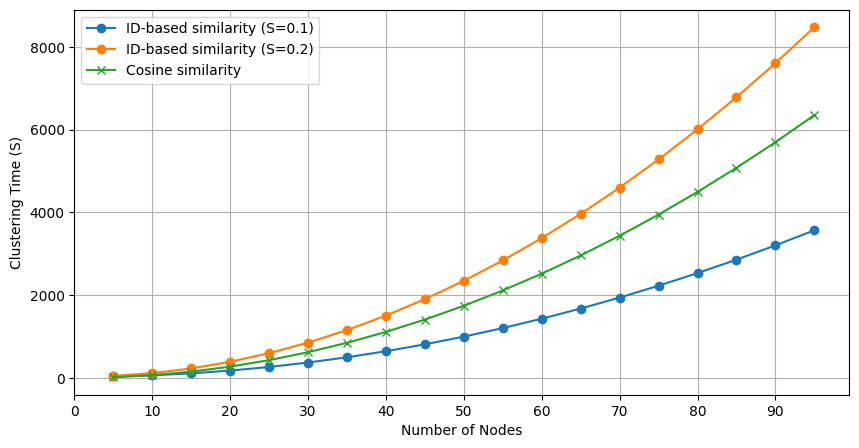

In [ ]:

nodes = []
times_ID1 = []
times_ID2 = []
times_cosine = []
import matplotlib.pyplot as plt

for node in range(5,100,5):
    full_time_ID1=ID_time1+(node*(node-1)/2)*intersection_time1+ID_Communication_time1
    full_time_ID2=ID_time2+(node*(node-1)/2)*intersection_time2+ID_Communication_time2
    full_time_cosine=(node*(node-1)/2)*cosine_time+Cosine_Communication_time
    nodes.append(node)
    times_ID1.append(full_time_ID1)
    times_ID2.append(full_time_ID2)
    times_cosine.append(full_time_cosine)

    print("node:", node, " time:", full_time_ID1, "cosine time:", full_time_cosine)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(nodes, times_ID1, label='ID-based similarity (S=0.1)', marker='o')
plt.plot(nodes, times_ID2, label='ID-based similarity (S=0.2)', marker='o')
plt.plot(nodes, times_cosine, label='Cosine similarity', marker='x')

# Labeling the plot

plt.xlabel('Number of Nodes')
plt.ylabel('Clustering Time (S)')
plt.legend()
plt.xticks(range(0, 100, 10))
# Show the plot
plt.grid(True)
plt.show()

save_excel(nodes, times_ID1,times_ID2,times_cosine )